### 네이버 이미지 크롤링

#### 핵심 코드 : 화면 아래쪽 끝까지 스크롤 이동
 - driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
 
 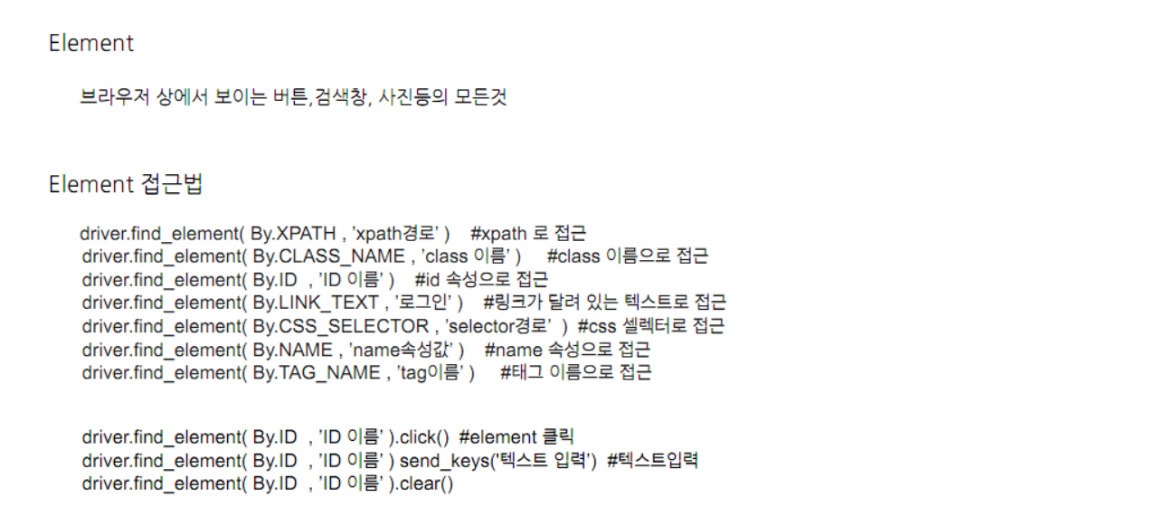
 
#### 참고: 찾는  Element가 여러개 이면 Elements임
 - driver.find_elements(By,ID,'ID이름')

In [5]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
import pandas as pd
from tqdm import tqdm
import urllib.request
import requests

options=Options()
options.add_experimental_option('detach',True) #화면이 꺼지지 않고 유지
options.add_argument('--start-maximized') # 화면을 최대화
service=Service(ChromeDriverManager().install()) #크롬드라이버 자동 설치

driver=webdriver.Chrome(service=service, options=options)

keyword='고양이'
url='https://search.naver.com/search.naver?where=image&sm=tab_jum&query='+keyword

driver.get(url)
time.sleep(2)

elems=driver.find_elements(By.CLASS_NAME,'_image')
imgs=[]
for elem in elems:
    imgs.append(elem.get_attribute('src'))
driver.quit()

In [10]:
for idx, img in enumerate(imgs):
    urllib.request.urlretrieve(img,f'image/{keyword}_{idx:0>4}.jpg')

### 다음이미지 크롤링 (1) : 첫 화면만 크롤링

#### 핵심 코드 : 화면 아래쪽 끝까지 스크롤 이동
 - driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")

In [11]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
import pandas as pd
from tqdm import tqdm
import urllib.request
import requests

options=Options()
options.add_experimental_option('detach',True) #화면이 꺼지지 않고 유지
options.add_argument('--start-maximized') # 화면을 최대화
service=Service(ChromeDriverManager().install()) #크롬드라이버 자동 설치

driver=webdriver.Chrome(service=service, options=options)

keyword='고양이'
url='https://search.daum.net/search?w=img&nil_search=btn&DA=NTB&enc=utf8&q='+keyword

driver.get(url)
time.sleep(2)

elems=driver.find_elements(By.CLASS_NAME,'thumb_img')
imgs=[]
for elem in elems:
    imgs.append(elem.get_attribute('src'))
driver.quit()

In [14]:
for idx, img in enumerate(imgs):
    urllib.request.urlretrieve(img,f'image/{keyword}_{idx:0>4}.jpg')

### 다음이미지 크롤링 (1) : 여러 화면 크롤링

#### 핵심 코드 : 화면 아래쪽 끝까지 스크롤 이동
 - driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")

In [36]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
import pandas as pd
from tqdm import tqdm
import urllib.request
import requests

options=Options()
options.add_experimental_option('detach',True) #화면이 꺼지지 않고 유지
options.add_argument('--start-maximized') # 화면을 최대화
service=Service(ChromeDriverManager().install()) #크롬드라이버 자동 설치

driver=webdriver.Chrome(service=service, options=options)

keyword='고양이'
url='https://search.daum.net/search?w=img&nil_search=btn&DA=NTB&enc=utf8&q='+keyword

driver.get(url)
time.sleep(2)


# 화면 스크롤 

for i in range(10):
    
    try:
        driver.find_element(By.XPATH,'//*[@id="imgColl"]/div[5]/a[1]').click()
        time.sleep(2)
    except:
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
        time.sleep(2)

elems=driver.find_elements(By.CLASS_NAME,'thumb_img')

imgs=[]

for elem in elems:
    imgs.append(elem.get_attribute('src'))

driver.quit()

In [30]:
# 이미지 저장
for idx, img in enumerate(imgs):
    urllib.request.urlretrieve(img,f'image/{keyword}_{idx:0>4}.jpg')

### 다음이미지 크롤링 (2) : 여러 화면 크롤링

#### 핵심 코드 : 화면 아래쪽 끝까지 스크롤 이동
 - driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")

In [41]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
import pandas as pd
from tqdm import tqdm
import urllib.request
import requests

options=Options()
options.add_experimental_option('detach',True) #화면이 꺼지지 않고 유지
options.add_argument('--start-maximized') # 화면을 최대화
service=Service(ChromeDriverManager().install()) #크롬드라이버 자동 설치

driver=webdriver.Chrome(service=service, options=options)

keyword='고양이'
url='https://search.daum.net/search?w=img&nil_search=btn&DA=NTB&enc=utf8&q='+keyword

driver.get(url)
time.sleep(2)


# 화면 스크롤 

for i in range(1,11):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    time.sleep(2)
    if i%4==0:
        driver.find_element(By.XPATH,'//*[@id="imgColl"]/div[5]/a[1]').click()
        time.sleep(2)

elems=driver.find_elements(By.CLASS_NAME,'thumb_img')

imgs=[]

for elem in elems:
    imgs.append(elem.get_attribute('src'))

driver.quit()

## [미션] 구글 이미지 크롤링
- data폴더 만들고
- data안에 "검색어"별 폴더를 만들어 500개이상 크롤링하세요